In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
#Create a path to where your data is stored.
path = r'C:\Users\Hiroshi\Documents\06-2024 ClimateWins'

In [3]:
#Read in the European weather data.
climate_unscaled = pd.read_csv(os.path.join(path, '01 Data','Weather_prediction.csv'))
climate_unscaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
#Read in the pleasant weather data.
weather = pd.read_csv(os.path.join(path, '01 Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
climate_unscaled_nodate = climate_unscaled.drop(['DATE','MONTH'], axis=1)

In [11]:
#create scaler object using StandardScaler from sklearn.preprocessing
scaler = StandardScaler()

In [13]:
columns = climate_unscaled_nodate.columns

In [15]:
#create new df with scaled data
climate_scaled = pd.DataFrame(scaler.fit_transform(climate_unscaled_nodate), columns = columns)
climate_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [17]:
#Combine date and scaled data
climate_scaled_date = pd.concat([climate_unscaled['DATE'],climate_scaled], axis=1)

In [19]:
#Reduce your dataset to a single year
dfyear = climate_scaled_date.loc[climate_scaled_date['DATE'].astype(str).str[:4] == '2020'] #<-----INSERT YEAR HERE
dfyear

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,20200101,-2.248803,-0.573924,1.006770,2.428216,-0.757400,-0.445514,-0.179228,0.442567,-1.465688,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
21916,20200102,-2.248803,1.337054,1.006770,2.076683,-0.746661,-0.445514,-0.179228,0.442567,-1.397785,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
21917,20200103,0.660514,0.108568,0.464749,1.633445,-1.004410,-0.425473,-0.179228,-0.694136,-0.691591,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
21918,20200104,0.244897,0.245067,0.284075,2.458784,-1.133285,-0.164944,-0.179228,-0.856522,-0.596526,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
21919,20200105,-2.248803,-1.665912,0.826097,2.856170,-0.725182,-0.445514,-0.179228,0.465765,-1.180494,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,20201227,1.076130,3.657528,-0.528957,-2.646090,-1.165503,0.376155,-0.179228,-1.065304,-1.180494,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
22277,20201228,0.660514,1.883048,-0.167609,-5.381936,-1.165503,-0.225066,-0.179228,-0.972512,-0.786655,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
22278,20201229,0.244897,1.883048,-0.167609,-3.593702,-1.176243,-0.004619,-0.179228,-1.018908,-0.813817,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
22279,20201230,0.244897,-0.846921,0.826097,-1.698479,-1.101066,-0.365351,-0.179228,-0.995710,-1.058269,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453


In [33]:
dfyear.iloc[:,1:]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,-2.248803,-0.573924,1.006770,2.428216,-0.757400,-0.445514,-0.179228,0.442567,-1.465688,-1.489431,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
21916,-2.248803,1.337054,1.006770,2.076683,-0.746661,-0.445514,-0.179228,0.442567,-1.397785,-1.274838,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
21917,0.660514,0.108568,0.464749,1.633445,-1.004410,-0.425473,-0.179228,-0.694136,-0.691591,-0.845652,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
21918,0.244897,0.245067,0.284075,2.458784,-1.133285,-0.164944,-0.179228,-0.856522,-0.596526,-0.615731,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
21919,-2.248803,-1.665912,0.826097,2.856170,-0.725182,-0.445514,-0.179228,0.465765,-1.180494,-1.198198,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,1.076130,3.657528,-0.528957,-2.646090,-1.165503,0.376155,-0.179228,-1.065304,-1.180494,-1.520087,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
22277,0.660514,1.883048,-0.167609,-5.381936,-1.165503,-0.225066,-0.179228,-0.972512,-0.786655,-0.677043,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
22278,0.244897,1.883048,-0.167609,-3.593702,-1.176243,-0.004619,-0.179228,-1.018908,-0.813817,-0.723027,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
22279,0.244897,-0.846921,0.826097,-1.698479,-1.101066,-0.365351,-0.179228,-0.995710,-1.058269,-0.891636,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453


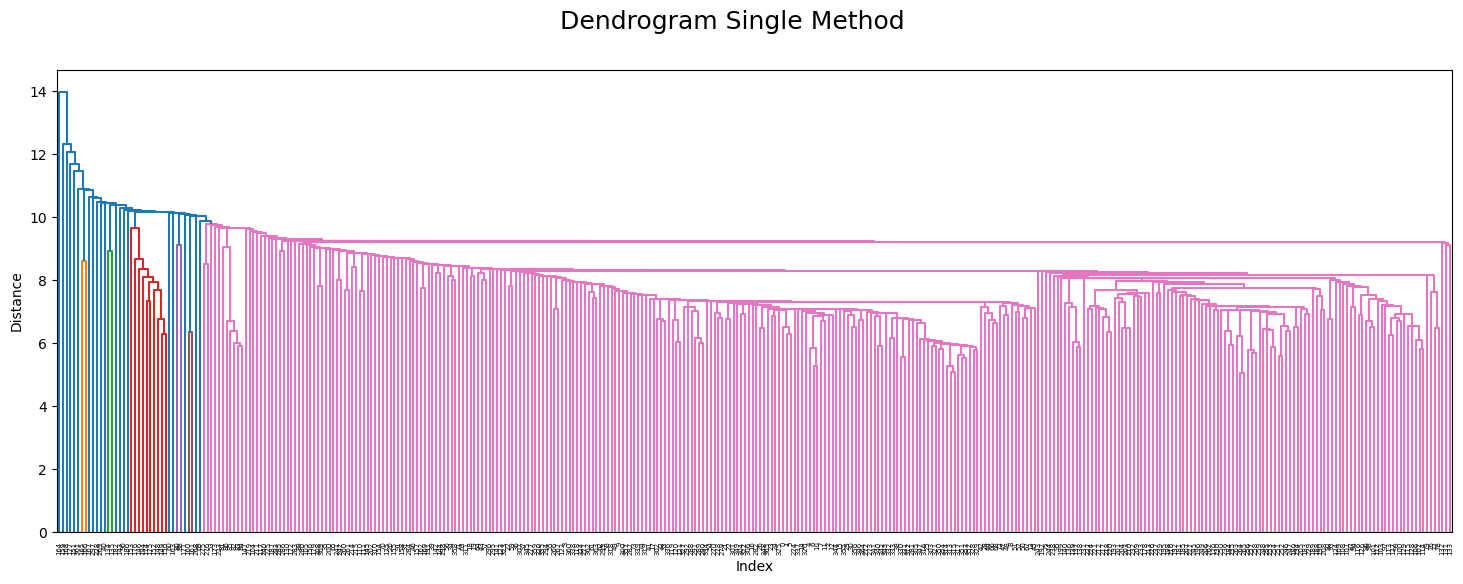

In [39]:
#Create dendrogram using single method
distance_single = linkage(dfyear.iloc[:,1:],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

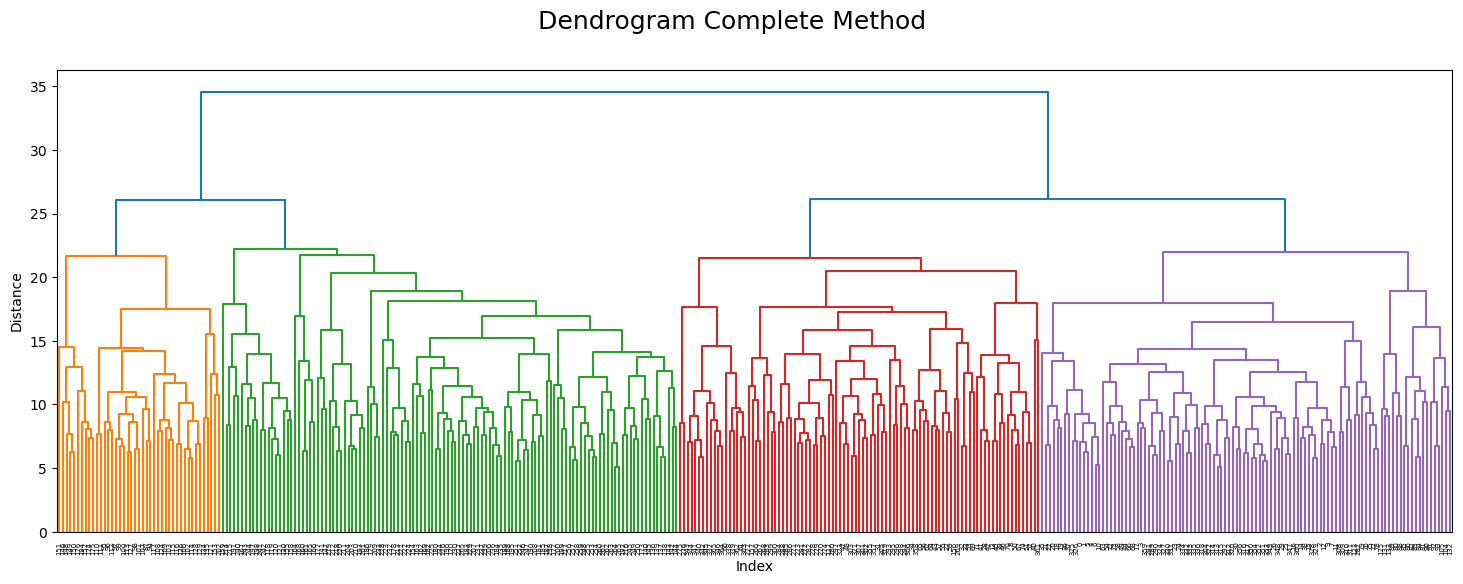

In [47]:
#Create dendrogram using single method
distance_single = linkage(dfyear.iloc[:,1:],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

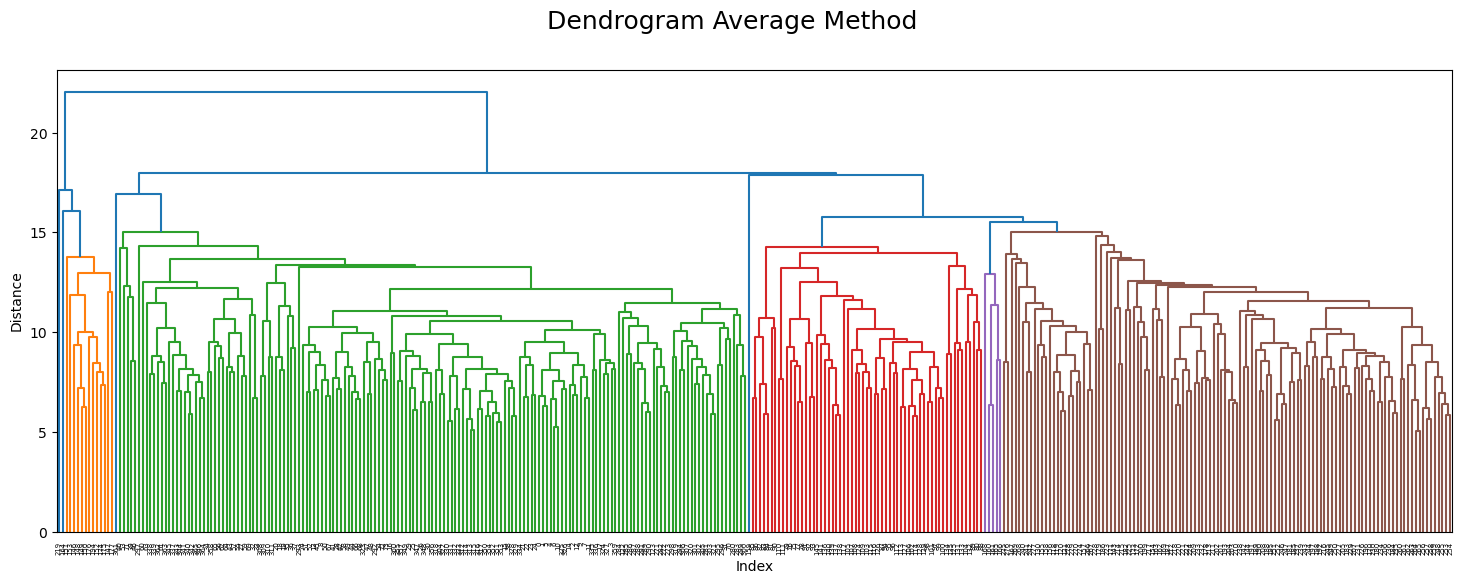

In [49]:
#Create dendrogram using single method
distance_single = linkage(dfyear.iloc[:,1:],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

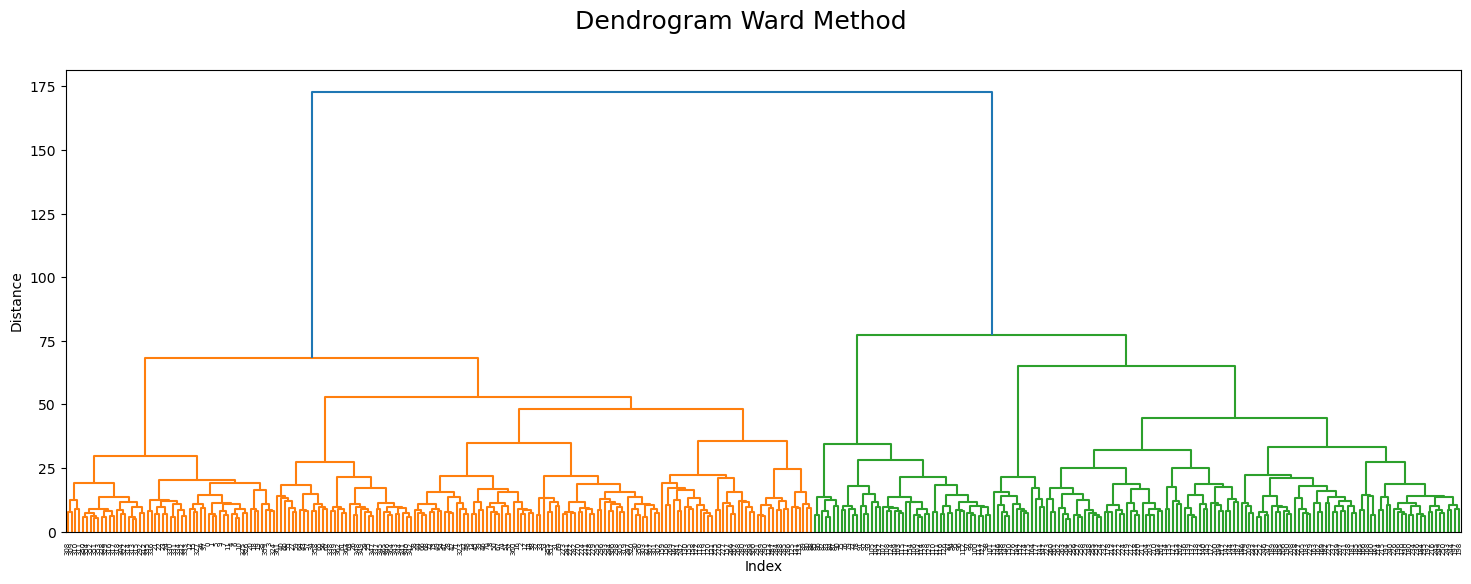

In [51]:
#Create dendrogram using single method
distance_single = linkage(dfyear.iloc[:,1:],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

#### PCA

In [62]:
#Run the PCA model, reducing to 2 components
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(dfyear.iloc[:,1:])

In [64]:
principalComponents

array([[-9.78473226e+00,  6.38020744e+00, -5.30282951e+00, ...,
         6.31454616e-01, -1.14795315e+00, -3.50836428e-01],
       [-1.02458518e+01,  3.79214537e+00, -4.62831369e+00, ...,
        -1.12196735e+00, -8.04653168e-01, -3.49061724e-01],
       [-9.52037227e+00,  2.26082255e+00, -2.44805185e+00, ...,
        -1.46237092e+00, -8.37575678e-03,  8.22501754e-01],
       ...,
       [-1.07474086e+01, -4.42426637e+00,  6.46053907e+00, ...,
        -2.05239406e+00, -4.32818722e-01,  1.03516504e+00],
       [-1.01771275e+01, -1.88070402e+00,  3.14945446e+00, ...,
        -8.90033275e-01,  1.11496234e+00,  5.76463740e-01],
       [-1.11325574e+01, -7.31468343e-01,  2.23797784e+00, ...,
         3.08941042e-01,  1.27075677e-01,  5.10756647e-02]])

In [70]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18'])

In [72]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18
0,-9.784732,6.380207,-5.302830,-1.347468,-0.324703,0.255627,1.326285,0.054915,0.111550,-2.124035,0.877511,-2.373703,0.156205,-0.640833,-1.165473,0.631455,-1.147953,-0.350836
1,-10.245852,3.792145,-4.628314,-0.008420,1.033681,0.729600,1.094683,0.607961,0.771050,-0.037388,1.265483,-0.829358,0.061696,-2.410324,-0.816728,-1.121967,-0.804653,-0.349062
2,-9.520372,2.260823,-2.448052,-0.090948,2.608893,0.759867,-1.397921,1.699480,-0.054539,-0.646990,-1.429985,-1.260181,0.407431,-0.869840,1.904345,-1.462371,-0.008376,0.822502
3,-9.199022,3.081494,-2.020440,-4.763422,3.226437,-2.186344,-0.634322,-0.235899,0.089515,0.145180,1.049392,0.760903,-1.068418,-1.067212,-0.425432,-1.660917,-0.334866,1.217022
4,-8.941131,4.723754,-4.772322,-2.514746,1.402576,-1.541485,2.200184,-1.252248,-1.287435,-1.850833,0.205333,0.306681,0.233037,1.418092,-0.153806,-0.572904,-0.864342,-0.223567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-12.489372,-4.009026,6.474718,7.598385,1.254905,2.057745,2.324455,0.739200,0.627554,0.841012,0.506145,0.436562,1.492653,0.688731,1.000378,-1.114437,-0.834789,-1.896781
362,-11.487524,-6.592894,9.304640,1.510171,-5.545204,-0.111095,3.710588,-0.073687,0.032454,-1.280588,0.748377,-2.822327,0.173084,-0.716011,-1.371561,-2.198495,-0.771770,-0.525694
363,-10.747409,-4.424266,6.460539,0.819294,-4.281205,-0.753491,1.927808,-0.261219,1.223913,0.264876,1.547448,-0.950334,-0.639468,-1.568645,-0.740967,-2.052394,-0.432819,1.035165
364,-10.177128,-1.880704,3.149454,-0.958982,-2.298891,-0.947158,1.732366,-0.695793,-1.458591,-0.986697,0.599672,-1.630704,0.597175,-0.629027,0.656628,-0.890033,1.114962,0.576464


In [74]:
#Export PCA data 
dfPCA.to_csv(os.path.join(path, '01 Data', '2020_PCA.csv'))

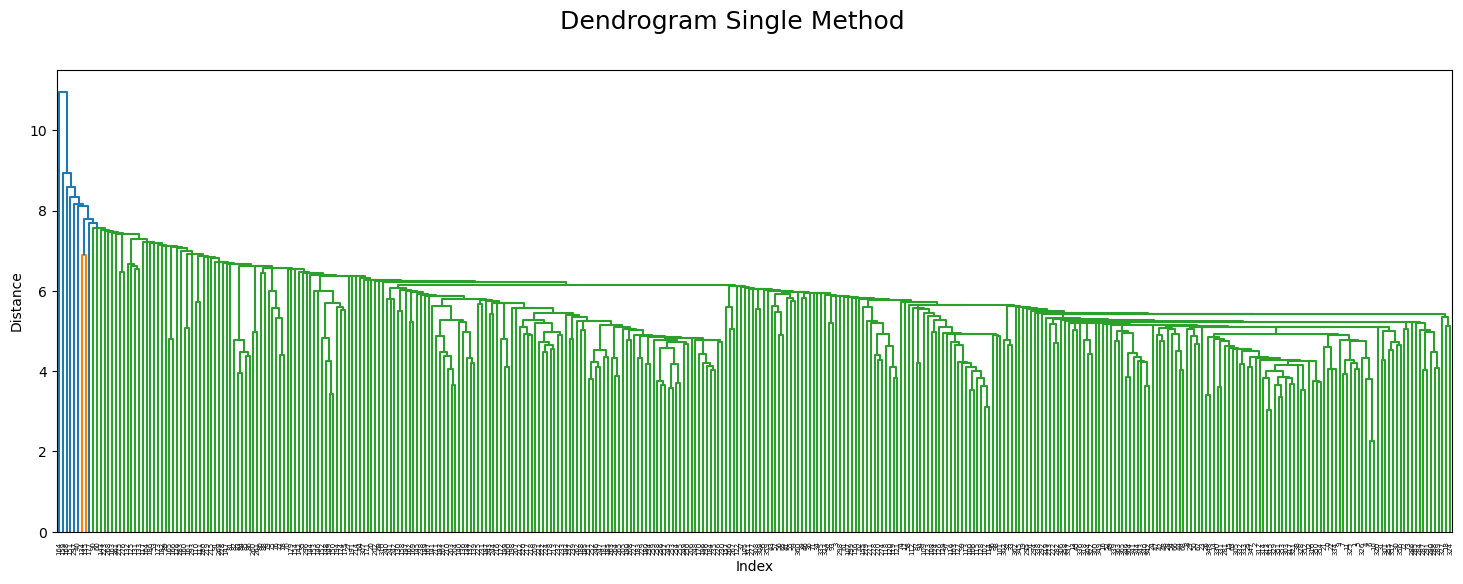

In [76]:
#Create dendrogram using single method
distance_single = linkage(dfPCA,method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

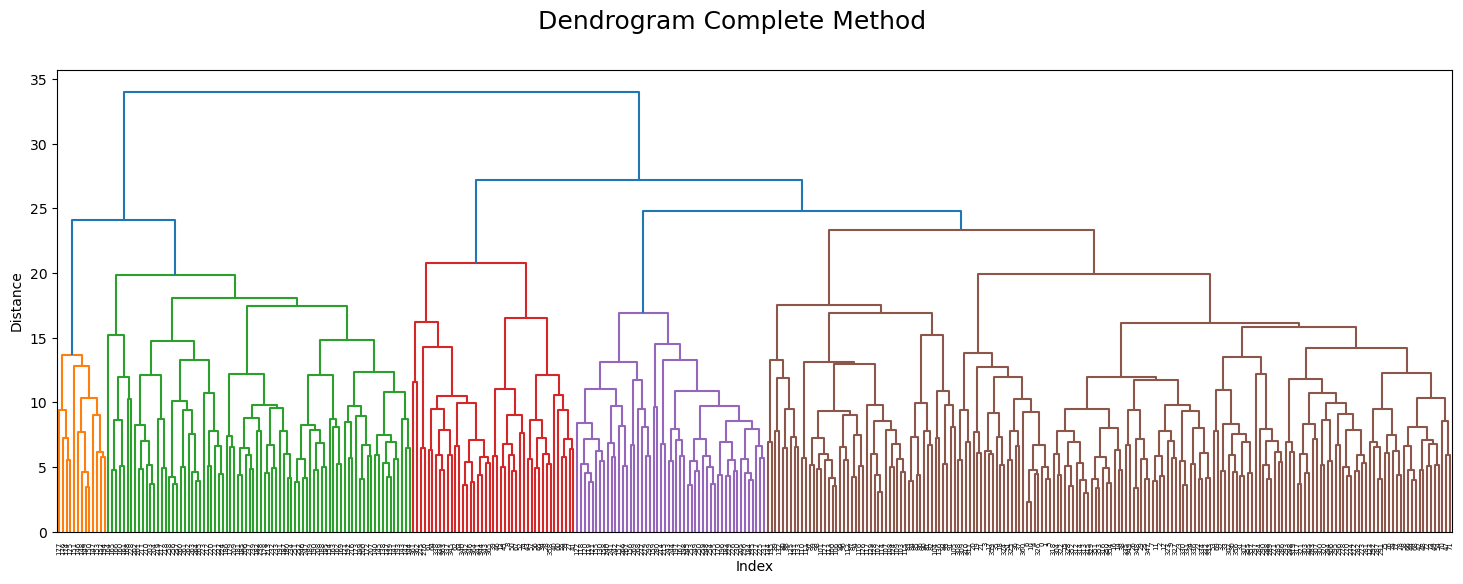

In [80]:
#Create dendrogram using complete method
distance_single = linkage(dfPCA,method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

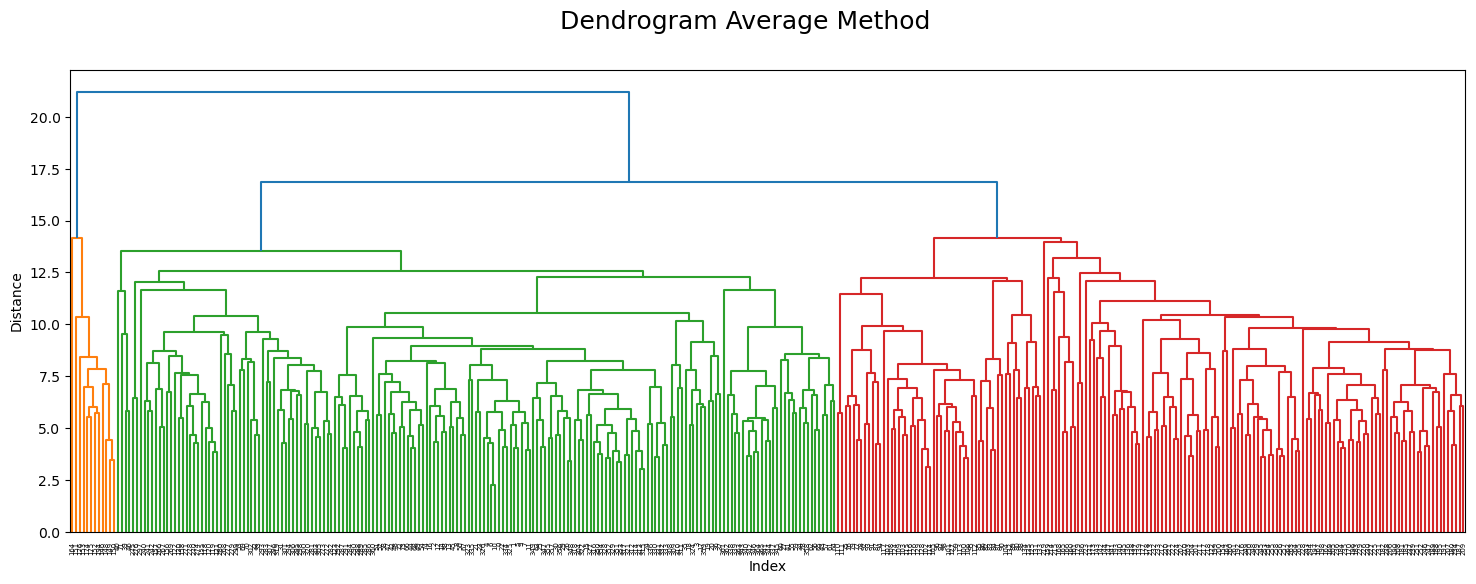

In [82]:
#Create dendrogram using average method
distance_single = linkage(dfPCA,method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

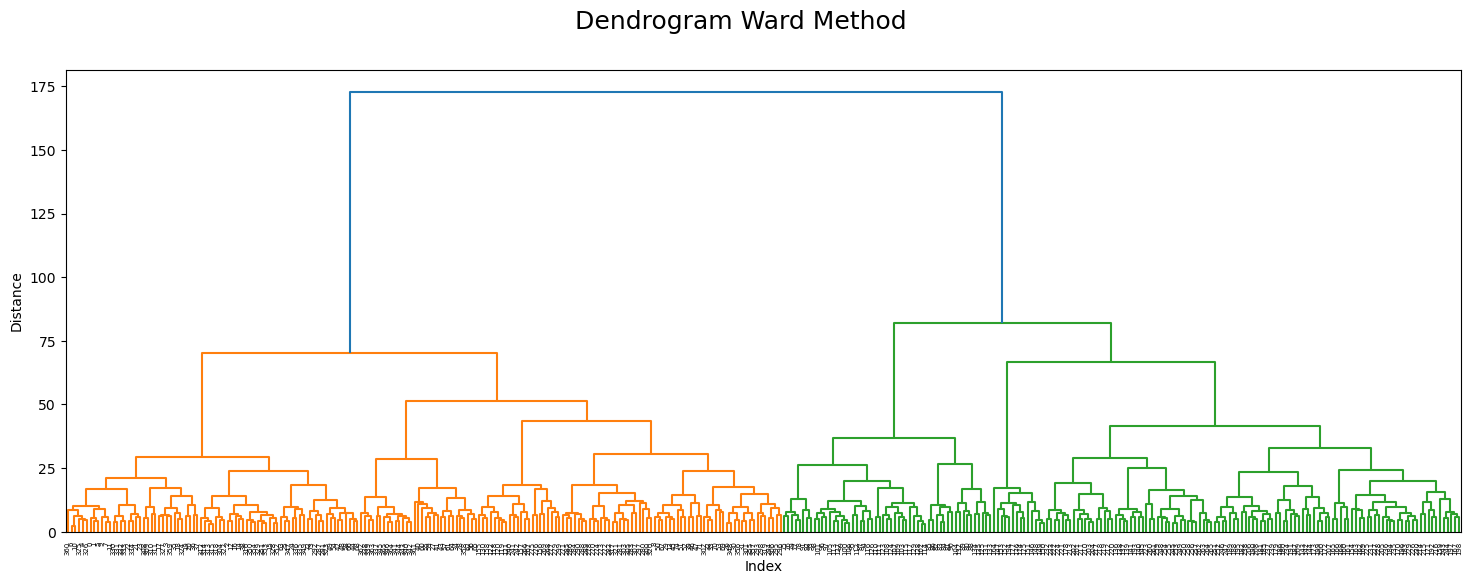

In [84]:
#Create dendrogram using ward method
distance_single = linkage(dfPCA,method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()